Updated: 13/12/2023

Code to demonstrate the quadratic capability of the multimode ringdown fit function


### Initialisation

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from qnmfitsrd.qnm import qnm
qnm = qnm()

import qnmfitsrd as qnmfits

sim = qnmfits.SXS(ID=305, zero_time=(2,2))

Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


### Compare linear and quadratic+linear model 

**Most general list of modes:** *[(l,m,n,p) for l in range(2,L) for m in range(-l,l) for n in range(0,N) for p in [-1,1]]*


Linear mismatch = 0.42282107060828755
Quadratic mismatch = 0.4227186200209154


[]

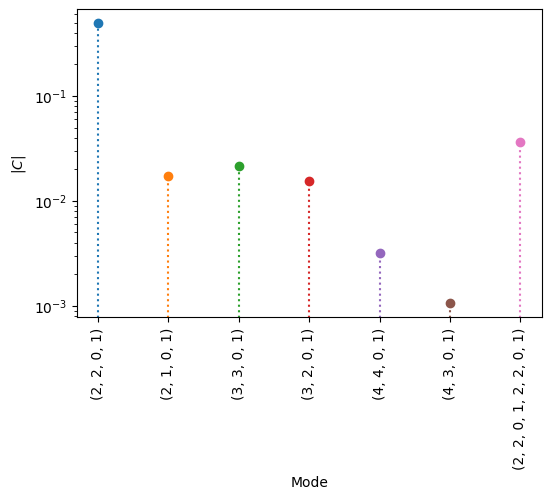

In [264]:
modes = [(2,2,0,1), (2,1,0,1), (3,3,0,1), (3,2,0,1), (4,4,0,1), (4,3,0,1)]

new_modes = modes + [(2,2,0,1,2,2,0,1)]

best_fit_l = qnmfits.multimode_ringdown_fit(
    sim.times,
    sim.h,
    modes,
    Mf=sim.Mf,
    chif=sim.chif_mag,
    t0=0,
)

best_fit_q = qnmfits.multimode_ringdown_fit(
    sim.times,
    sim.h,
    new_modes,
    Mf=sim.Mf,
    chif=sim.chif_mag,
    t0=0,
    #spherical_modes=[(2,2)],
)

print(f"Linear mismatch = {best_fit_l['mismatch']}")
print(f"Quadratic mismatch = {best_fit_q['mismatch']}")

qnmfits.plot_mode_amplitudes(
    best_fit_q['C'], best_fit_q['mode_labels'], log=False)

plt.semilogy()

In [ ]:
mode_pairs = [(2,2,0,1), 
              (3,3,0,1), 
              (4,4,0,1), 
              (5,5,0,1), 
              (6,6,0,1), 
              (7,7,0,1),
              (8,8,0,1),
              (9,9,0,1),
              (2,2,0,1,2,2,0,1), 
              (2,2,0,1,3,3,0,1),
              (3,3,0,1,3,3,0,1), 
              (2,2,0,1,4,4,0,1),
              (3,3,0,1,4,4,0,1),
              (4,4,0,1,4,4,0,1), 
              (5,5,0,1,5,5,0,1)] 

best_fits = qnmfits.multimode_ringdown_fit(
    sim.times,
    sim.h,
    mode_pairs,
    Mf=sim.Mf,
    chif=sim.chif_mag,
    t0=0,
)

qnmfits.plot_mode_amplitudes(
    best_fits['C'], best_fits['mode_labels'], log=False)

plt.semilogy()

## Test whether quadratic modes are calculated correctly  

1. Plot $C$ as a function of start time. 
2. Vary the frequency and determine the mismatch. We should expect the mismatch the be minimised for the frequency (and hence mass and spin of the BH) that matches what is expected (i.e. $2\omega_{linear}$). 

#### Amplitude as a function of start time

[]

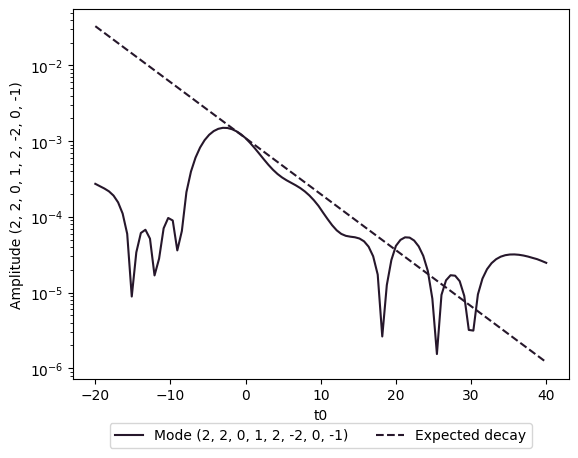

In [240]:
modes = [(4,0,n,p) for n in range(7+1) for p in [-1,+1]] + [(2,2,0,1,2,-2,0,-1)]
chosen_mode = len(modes)-1
color_palette = sns.color_palette('mako', len(modes)+1)
t0_array = np.linspace(-20, 40, 100)

best_fit_data = [qnmfits.ringdown_fit(
        sim.times,
        sim.h[4,0],
        modes,
        Mf=sim.Mf,
        chif=sim.chif_mag,
        t0=t0,
    )['C']
    for t0 in t0_array
]

best_fit_data = pd.DataFrame(best_fit_data)
best_fit_data['t0'] = t0_array

"""
for i, mode in enumerate(modes):
    frequencies = np.array(qnm.omega_list(modes, sim.chif_mag, sim.Mf))
    tau = -1/np.imag(frequencies[i])
    intitial_amp = best_fit_data.iloc[0, i]
    expected_amp = abs(intitial_amp)*np.exp(-t0_array/tau)

    plt.plot(t0_array, abs(best_fit_data[i]), color=color_palette[i], label = f"Mode {modes[i]}")
    plt.plot(t0_array, expected_amp, c=color_palette[i], ls='--', label=f'Expected decay {modes[i]}')
"""

frequencies = np.array(qnm.omega_list(modes, sim.chif_mag, sim.Mf))
tau = -1/np.imag(frequencies[chosen_mode])
initial_amp = best_fit_data[best_fit_data['t0'] == 0][chosen_mode].item()
expected_amp = np.exp(-t0_array/tau)*abs(initial_amp)

plt.plot(t0_array, abs(best_fit_data[chosen_mode]), color=color_palette[1], label = f"Mode {modes[chosen_mode]}")
plt.plot(t0_array, expected_amp, c=color_palette[1], ls='--', label=f'Expected decay')

plt.xlabel('t0')
plt.ylabel(f'Amplitude {modes[chosen_mode]}')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol = len(modes)//2)
plt.semilogy()


### Mismatch as a function of frequency

[0.010192367337292896, 0.010148347217243892, 0.010102283512283705, 0.010054072491170407, 0.010003602731690875, 0.009950756830056195, 0.009895413368852246, 0.009837448416842198, 0.009776736377803852, 0.009713150460365694, 0.009646562831658989, 0.009576844396510076, 0.009503864088857061, 0.009427487232755438, 0.00934757243260731, 0.009263966370645527, 0.009176495656213701, 0.009084954883336271, 0.00898909057641517, 0.008888581310862453, 0.008783015931310367, 0.008671874146716552, 0.008554515729723988, 0.008430185327127693, 0.008298037511764722, 0.00815717997384724, 0.00800672415647452, 0.00784582740387052, 0.007673712224771756, 0.007489657506148717, 0.0072929684416706, 0.007082939140944378, 0.006858822726672598, 0.006619820908762675, 0.006365100405049007, 0.006093839682975277, 0.005805306319750403, 0.005498959341681986, 0.00517456242299863, 0.004832288508999971, 0.004472799618113754, 0.004097300987578434, 0.0037075931043822896, 0.003306162591980799, 0.002896349502546469, 0.00248260836738

[]

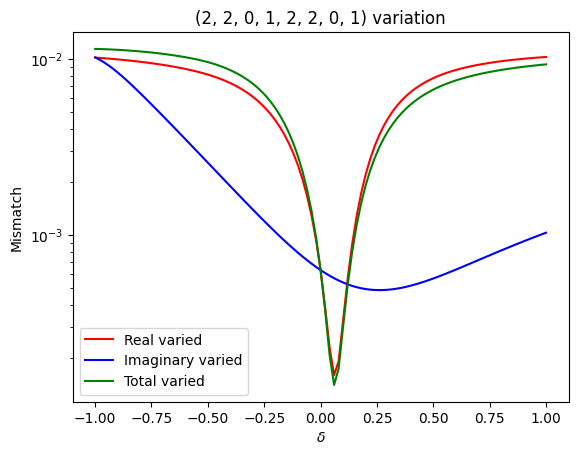

In [269]:
modes = [(l,m,n,1) for l in range(2,9) for m in range (-l,l) for n in range(3+1)] + [(2,2,0,1,2,2,0,1)]

delta = 1
mode_choice = -1

frequencies = np.array(qnm.omega_list(modes, sim.chif_mag, sim.Mf))
deltas = np.linspace(-delta, delta, 101)

best_fit_r_data = []
best_fit_i_data = []
best_fit_b_data = []

for delta in deltas:

    frequency_range_real = np.real(frequencies.copy()) 
    frequency_range_imag = np.imag(frequencies.copy()) 

    frequency_range_real[mode_choice] = frequency_range_real[mode_choice]*(1 + delta)
    frequency_range_imag[mode_choice] = frequency_range_imag[mode_choice]*(1 + delta) 

    omega_vary_real = frequency_range_real + 1j * np.imag(frequencies)
    omega_vary_imag = np.real(frequencies) + 1j * frequency_range_imag
    omega_vary_both = frequency_range_real + 1j * frequency_range_imag

    best_fit_r = qnmfits.multimode_ringdown_fit(
        sim.times,
        sim.h,
        modes,
        Mf=sim.Mf,
        chif=sim.chif_mag,
        t0=0,
        frequencies=omega_vary_real,
        spherical_modes=[(4,4)],
    )

    best_fit_i = qnmfits.multimode_ringdown_fit(
        sim.times,
        sim.h,
        modes,
        Mf=sim.Mf,
        chif=sim.chif_mag,
        t0=0,
        frequencies=omega_vary_imag,
        spherical_modes=[(4,4)],
    )

    best_fit_b = qnmfits.multimode_ringdown_fit(
        sim.times,
        sim.h,
        modes,
        Mf=sim.Mf,
        chif=sim.chif_mag,
        t0=0,
        frequencies=omega_vary_both,
        spherical_modes=[(4,4)],
    )

    best_fit_r_data.append(abs(best_fit_r['mismatch']))
    best_fit_i_data.append(abs(best_fit_i['mismatch']))
    best_fit_b_data.append(abs(best_fit_b['mismatch'])) 

print(best_fit_r_data)

plt.plot(deltas, best_fit_r_data, color='r')
plt.plot(deltas, best_fit_i_data, color='b')
plt.plot(deltas, best_fit_b_data, color='g')

plt.xlabel('$\delta$')
plt.ylabel('Mismatch')
plt.legend(['Real varied', 'Imaginary varied', 'Total varied']) 
plt.title(f"{modes[mode_choice]} variation")
plt.semilogy()



### Delta drift with a better model?

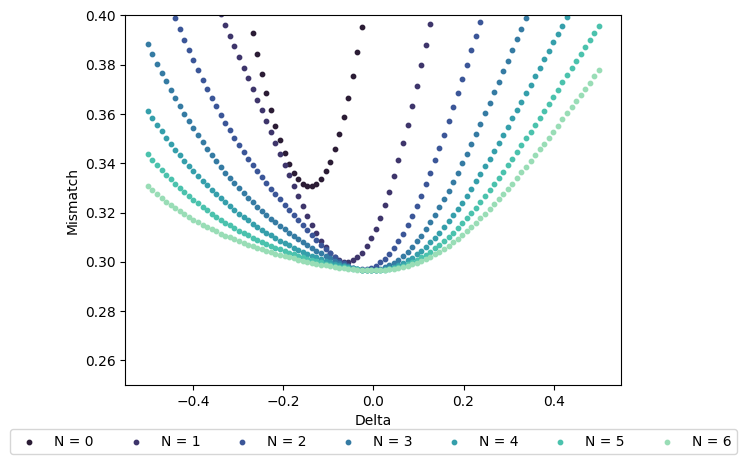

In [76]:
color_palette = sns.color_palette('mako', 7)

delta = 0.5
added_labels = [] 

for i, n in enumerate(range(0, 7)):
    modes = [(2, 2, n, 1) for n in range(n + 1)]

    frequencies = np.array(qnm.omega_list(modes, sim.chif_mag, sim.Mf))

    deltas = np.linspace(-delta, delta, 100)

    for delta in deltas:
        frequency_range_real = np.real(frequencies) * (1 + delta)
        frequency_range_imag = np.imag(frequencies) * (1 + delta)
        omega_vary_both = frequency_range_real + 1j * frequency_range_imag

        best_fit_b = qnmfits.multimode_ringdown_fit(
            sim.times,
            sim.h,
            modes,
            Mf=sim.Mf,
            chif=sim.chif_mag,
            t0=0,
            frequencies=omega_vary_both,
        )

        label = f"N = {n}"
        if label not in added_labels:
            plt.scatter(delta, abs(best_fit_b['mismatch']), color=color_palette[i], s=10, label=label)
            added_labels.append(label)
        else:
            plt.scatter(delta, abs(best_fit_b['mismatch']), color=color_palette[i], s=10)
    

plt.xlabel('Delta')
plt.ylabel('Mismatch')
plt.ylim(0.25, 0.4)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=7)



### Why do worse models minimise mismatch for delta ~ 0.25? 

e.g. with only the l=2, m=2 modes (inc. overtones) + (2,2,0,1,2,2,0,1). The mismatch is minimised for a frequency slightly below the the calculated value. This is because the quadratic mode is being fitted to the next biggest mode(s) i.e. the l=3, m=3 rather than the quadratic part. Note below that a delta ~ 0.8 gives a very similar frequency for the quadratic mode to the (3,3,0,1) mode's frequency. 

In [276]:
modes = [(2,2,n,1) for n in range(3+1)] + [(2,2,0,1,2,2,0,1)]

freq_quad = qnm.omega_list([(2,2,0,1,2,2,0,1)], sim.chif_mag, sim.Mf)[0].item()*0.8
freq_3 =  qnm.omega_list([(3,3,0,1)], sim.chif_mag, sim.Mf)[0].item()

print(freq_quad)
print(freq_3)


(0.889251057676879-0.13627575325245414j)
(0.8807910777091281-0.08739097460966065j)
